<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [10]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [11]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [12]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [13]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [14]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [ ]:
# Median Value of Owner-Occupied Homes (MEDV)

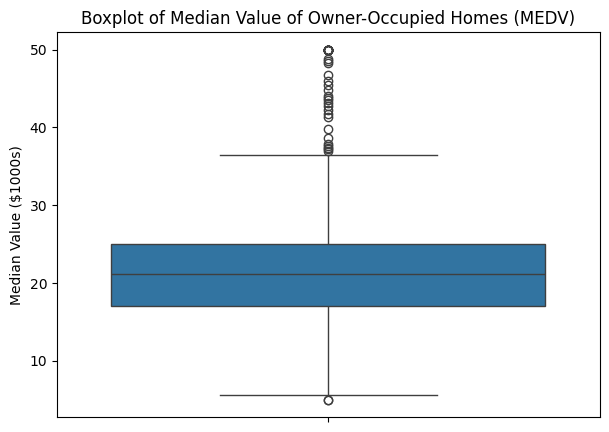

In [19]:
pyplot.figure(figsize=(7,5))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.ylabel("Median Value ($1000s)")
pyplot.show()

In [22]:
# Charles River Variable

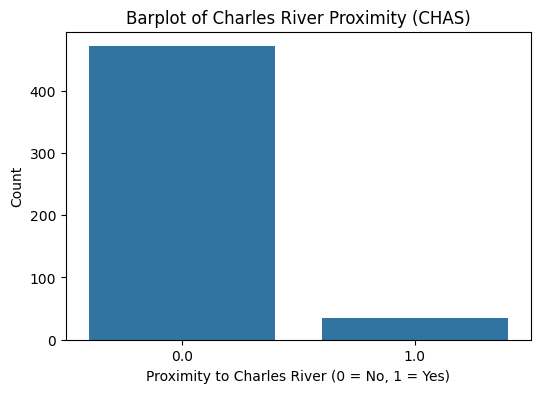

In [21]:
pyplot.figure(figsize=(6,4))
sns.countplot(x=boston_df['CHAS'])
pyplot.title("Barplot of Charles River Proximity (CHAS)")
pyplot.xlabel("Proximity to Charles River (0 = No, 1 = Yes)")
pyplot.ylabel("Count")
pyplot.show()

In [ ]:
# MEDV variable vs the AGE variable

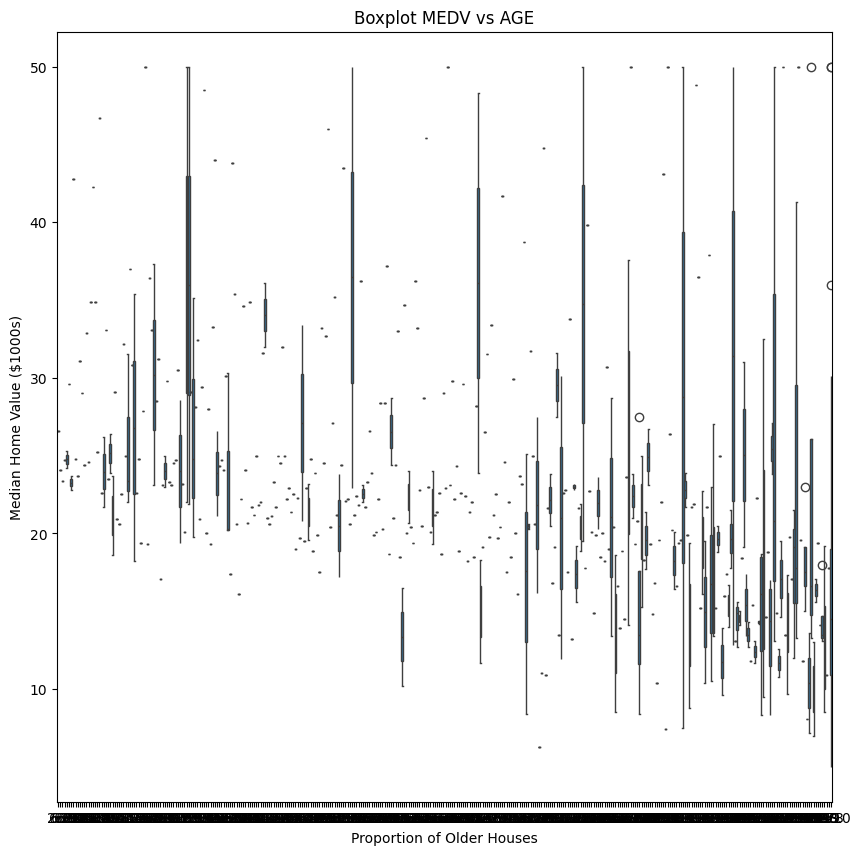

In [38]:
pyplot.figure(figsize=(10,10))
sns.boxplot(x=boston_df['AGE'], y=boston_df['MEDV'])
pyplot.title("Boxplot MEDV vs AGE")
pyplot.xlabel("Proportion of Older Houses")
pyplot.ylabel("Median Home Value ($1000s)")
pyplot.show()

In [ ]:
#Nitric Oxide (NOX) vs Business Acres (INDUS)

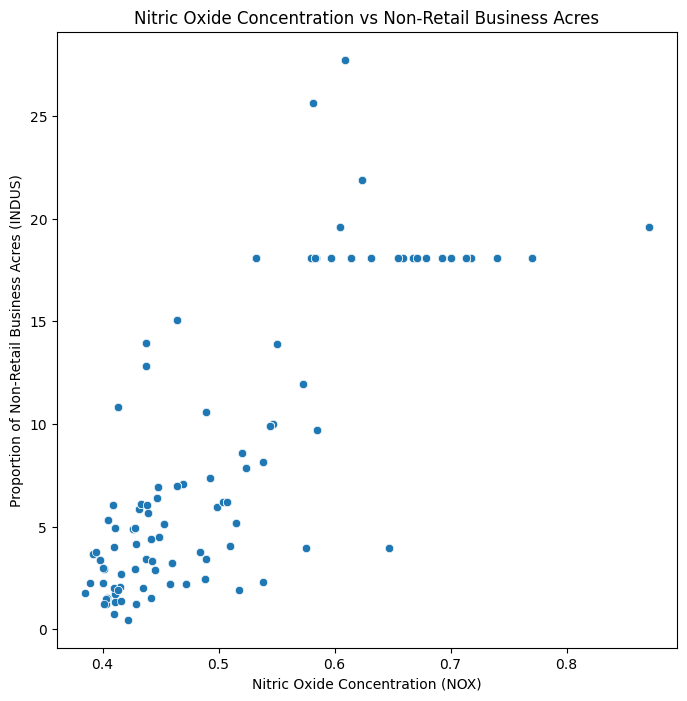

In [27]:
pyplot.figure(figsize=(8,8))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
pyplot.title("Nitric Oxide Concentration vs Non-Retail Business Acres")
pyplot.xlabel("Nitric Oxide Concentration (NOX)")
pyplot.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
pyplot.show()

In [ ]:
# histogram for the pupil to teacher ratio variable

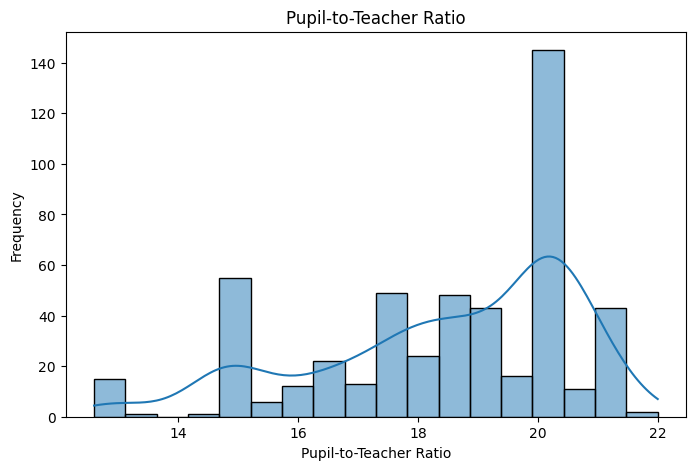

In [29]:
pyplot.figure(figsize=(8,5))
sns.histplot(boston_df['PTRATIO'], bins=18, kde=True)
pyplot.title("Pupil-to-Teacher Ratio")
pyplot.xlabel("Pupil-to-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()

In [ ]:
# Task 3: Use the appropriate tests to answer the questions provided.

# For each of the following questions;
#    Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#    Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#    Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#    What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#  Use α = 0.05
#    Perform the test Statistics.
#    State the conclusion from the test.

In [35]:
from scipy.stats import ttest_ind

chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_value = ttest_ind(chas_0, chas_1)

print("T-test for Charles Rivers if there is a significant impact on values near thhe Charles River")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference in median values.")
else:
    print("There is no significant difference in median values.")


T-test for Charles Rivers if there is a significant impact on values near thhe Charles River
T-Statistic: -3.9964
P-Value: 0.0001
There is a significant difference in median values.


In [ ]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [39]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


In [ ]:
#    Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [40]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [ ]:
#    What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [41]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        12:03:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""